
- [x] Top breeds
- [x] Avg likes / favorites by breed
- [x] Avg rating dog vs not dog
- [ ] What correlates (if anything) with the likes / favorite count
- [x] Wordcloud dog vs not dog
- [x] Like / favorites distribution over time … predict death of account (group by day)


In [1]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('analysis_data_set.csv', dtype={'tweet_id': 'object'})

In [3]:
df['created_at'] = pd.to_datetime(df.created_at)

In [4]:
df.describe()

,character_count,rating_ratio,favorite_count,retweet_count
count,1953.000000,1953.000000,1953.000000,1953.000000
mean,111.822837,1.164863,8908.530978,2761.408090
std,26.231909,4.106254,12212.221822,4638.821601
min,13.000000,0.000000,81.000000,16.000000
25%,94.000000,1.000000,1985.000000,629.000000
50%,116.000000,1.100000,4134.000000,1366.000000
75%,137.000000,1.200000,11394.000000,3238.000000
max,148.000000,177.600000,132810.000000,79515.000000


In [5]:
df.head(1)

,tweet_id,created_at,source,text,character_count,name,dog,breed,dogtionary,rating_ratio,favorite_count,retweet_count,expanded_urls,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter iPhone,This is Phineas. He's a mystical boy. Only eve...,85,Phineas,False,orange,NaN,1.3,39467,8853,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


In [6]:
# breed count

breed_count = df.query('dog == True').groupby('breed').count()[['tweet_id']].sort_values('tweet_id', ascending=False)[:20]

In [7]:
# average likes and retweets by breed

avg_likes_retweets = df.query('dog == True').groupby('breed').mean()[['favorite_count', 'retweet_count']]

In [22]:
# dog vs not - chart each variable...

dog_vs_not = df.groupby('dog').mean()

In [25]:
dog_vs_not

,character_count,rating_ratio,favorite_count,retweet_count
dog,,,,
False,114.815842,1.378416,7762.669307,2675.293069
True,110.779006,1.090385,9308.158149,2791.441298


In [60]:
# word cloud dog vs not 

dog = " ".join(tweet for tweet in df.query('dog == True').text)
not_dog = " ".join(tweet for tweet in df.query('dog == False').text)

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'ckin', 'meet', 'say', 'hello', 'ck', 'dog'])

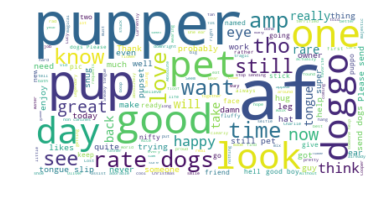

In [61]:
# dog word cloud

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(dog)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

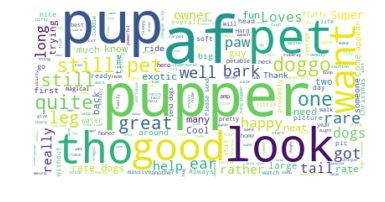

In [62]:
# not dog word cloud

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(not_dog)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
# account interaction forcasting 
df_day = df.copy()

date_fmt = pd.to_datetime(df_day.created_at).dt.strftime('%Y')
df_day['created_at'] = pd.to_datetime(date_fmt)

forcast = df_day.groupby('created_at').mean()

In [9]:
# correlation

In [65]:
forcast

,character_count,dog,rating_ratio,favorite_count,retweet_count
created_at,,,,,
2015-01-01,118.901690,0.660522,0.988673,2502.430108,1082.978495
2016-01-01,105.251314,0.771819,1.256784,7697.139853,2714.339642
2017-01-01,116.498575,0.809117,1.242593,24072.076923,6001.920228
